# Exercises Sheet 1 - Simulations

## 1. Calculate $\pi$ using Monte Carlo

In [1]:
# x^2 + y^2 <= r^2
function calculate_pi(N = 1000)
    S = 0
    x, y = rand(N), rand(N)
    c    = zeros(N)
    for i in 1:N
        if x[i]^2+y[i]^2 <= 1
            S+=1
            c[i] = 1
        end
    end
    π = 4*S/N
    return π,x,y,c
end

calculate_pi (generic function with 2 methods)

In [2]:
N = [100,1_000,10_000,100_000]
v,x,y,c = calculate_pi(10_000)

(3.138, [0.174901, 0.624087, 0.938215, 0.568182, 0.25588, 0.907418, 0.940071, 0.669238, 0.172822, 0.89635  …  0.298191, 0.214617, 0.214426, 0.473861, 0.679077, 0.252855, 0.287966, 0.306599, 0.257449, 0.558827], [0.127084, 0.526802, 0.690791, 0.988134, 0.680478, 0.960428, 0.0459175, 0.539415, 0.231943, 0.568021  …  0.117993, 0.860361, 0.498063, 0.895944, 0.288762, 0.650105, 0.421409, 0.376264, 0.187684, 0.772903], [1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0  …  1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [3]:
using Plots; pyplot()

┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /home/davi/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

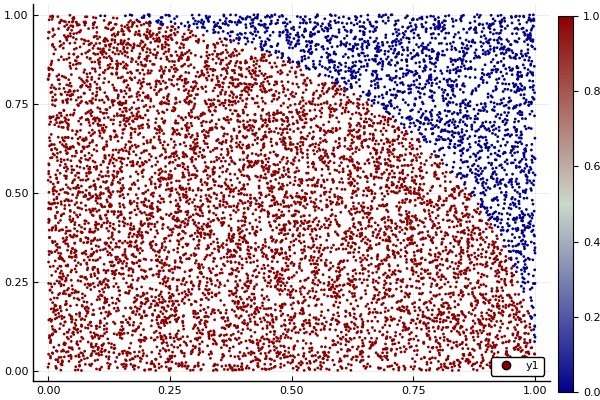

In [4]:
scatter(x,y,zcolor=c,markersize=2,markerstrokewidth = 0,c=:bluesreds)

## 2. *Box-Muller*

In [5]:
function box_muller(N=100)
    R = (-log.(rand(N))).^(1/2)
    v = 2*π*rand(N)
    X = R.*cos.(v)
    Y = R.*sin.(v)
    return X,Y
end

box_muller (generic function with 2 methods)

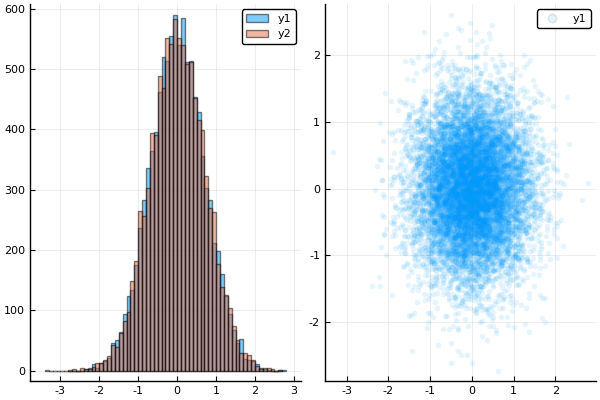

In [6]:
v = box_muller(10000)
h1 = histogram(v[1],alpha=0.5)
h2 = histogram!(v[end],alpha=0.5)
s  = plot(v[1],v[end],seriestype=:scatter,markerstrokewidth=0,alpha=0.1)
plot(h2,s,layout=2)

## 3. Genetic Linkage Model

Solução numérica

0.57	1.8594222944881917e18

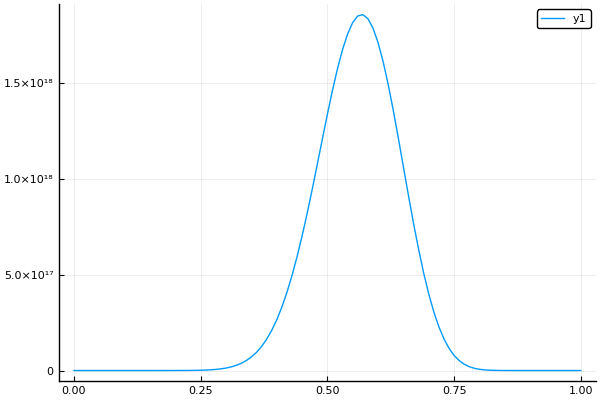

In [93]:
# using Distributions
post(θ,y) = ((2+θ)^y[1])*((1-θ)^(y[2]+y[3]))*θ^y[4]
v = [1,2,3,4]
post(0.1,v)

y = [69,9,11,11]
x = collect(0:0.01:1);
posterior = post.(x,Ref(y));
xmax = x[argmax(posterior)]
vmax = maximum(posterior)
print(xmax,"\t",vmax)
plot(x,posterior)

Solução simbólica

In [94]:
using SymPy
using LaTeXStrings

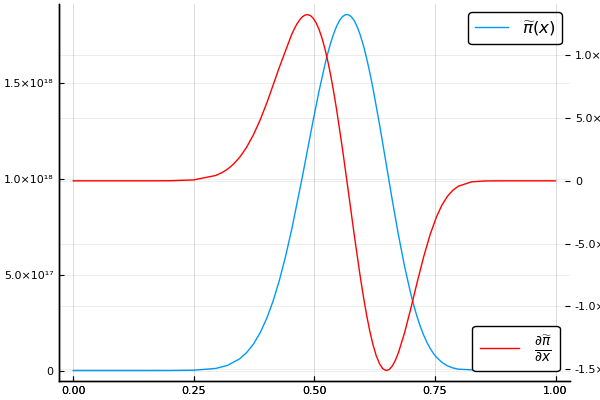

In [95]:
x  = symbols("x", real=true)
ex = ((2+x)^y[1])*((1-x)^(y[2]+y[3]))*x^y[4]
p1 = plot(ex, 0,1 ,label=L"\widetilde{\pi}(x)",legendfont=12)
p2 = plot!(twinx(),diff(ex), 0,1, label=L"\frac{\partial \widetilde{\pi}}{\partial x}",
    color="red",legend=:bottomright, legendfont=14)

In [102]:
solution = solve(diff(ex))
argmle = SymPy.N(solution[5])
mle    = round(SymPy.N(ex.subs(x,argmle)))

1.860237025726715232e+18

In [105]:
# Testando 10 de uma vez - somente um exemplo
x = rand(10)
u = rand(10)
aceitos = x[u .<= post.(x,Ref(y))]

8-element Array{Float64,1}:
 0.8147001268115117  
 0.17687421240689205 
 0.377968597564875   
 0.02897208322294187 
 0.5832275835310643  
 0.019212574066504118
 0.917459029934238   
 0.8648060286221446  

In [106]:
function rejection_sampling(N=1000)
    post(θ,y) = ((2+θ)^y[1])*((1-θ)^(y[2]+y[3]))*θ^y[4]
    y = [69,9,11,11]
    size = 0
    sample = zeros(N)
    T = zeros(0)
    t = 0
    while size < N
        x = rand()
        u = rand()
        if u <= post(x,y)/mle
            size+=1
            sample[size] = x
            append!(T , t)
            t = 0
        end
        t += 1
        
    end
    return sample, T
end

rejection_sampling (generic function with 2 methods)

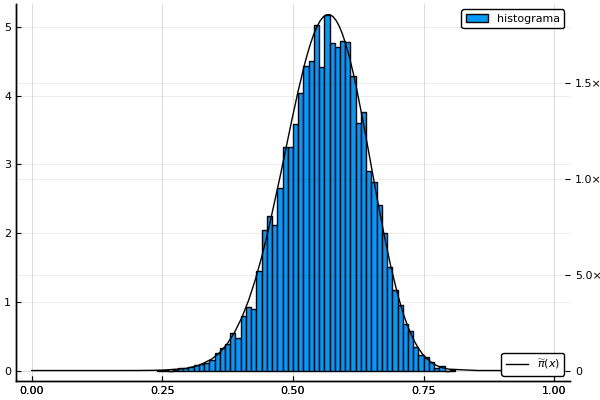

In [107]:
sample, T = rejection_sampling(10_000) 
histogram(sample,normalize=true, label="histograma")
plot!(twinx(),ex, 0,1 ,label=L"\widetilde{\pi}(x)",color="black",legend=:bottomright)

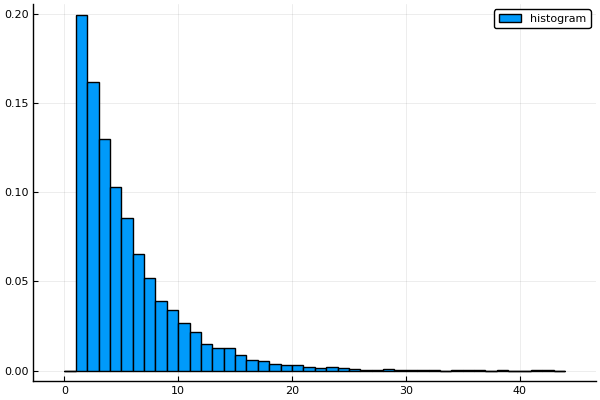

In [117]:
histogram(T,normalize=true, label="histogram",bins=0:maximum(T))